### LDA Topic Modeling

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text #adding stopwords
from nltk.tokenize import RegexpTokenizer
from gensim import matutils, models
from gensim.corpora import Dictionary
import scipy.sparse
from project_functions import *

In [53]:
# Read in dataset
tm = pd.read_csv('csv/sqr_&_comments.csv')

# Clean text function from project_functions file. Removes punctuation, whitespace, numbers, and makes text lowercase
cleanupText(tm, 'comments')

# Add additional stop words to remove
add_stop_words = [
    'school', 'schools', 'ps', 'teacher', 'teachers', 'student', 'students', 'kid',
    'kids', 'th', 'year', 'years', 'grade', 'like', 'good', 'parent', 'parents', 'ms',
    'child', 'children', 'read', 'new', 'dont', 'don\'t', 'just', 'like', 'great', 'high',
    'im', 'really', 'say', 'best', 'new', 'york', 'son', 'daughter']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Create the document-term-matrix
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=stop_words, ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tm['comments'])
dtm = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())

# Convert to a term-document-matrix
tdm = dtm.transpose()

# Format term-document-matrix as sparse matrix and corpus for gensim
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Create dictionary of all terms and locations from countVectorizer variable
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

# Run LDA model
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=100, random_state=34)
lda.print_topics()

/Users/kevinmacmat/opt/anaconda3/envs/capstone_env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 't'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[(0,
  '0.007*"principal" + 0.005*"staff" + 0.005*"middle" + 0.005*"work" + 0.005*"know" + 0.005*"time" + 0.005*"class" + 0.005*"community" + 0.004*"learning" + 0.004*"program"'),
 (1,
  '0.012*"program" + 0.010*"principal" + 0.007*"community" + 0.006*"language" + 0.006*"programs" + 0.005*"prek" + 0.005*"class" + 0.005*"education" + 0.004*"dual" + 0.004*"learning"'),
 (2,
  '0.005*"gt" + 0.004*"principal" + 0.004*"know" + 0.003*"class" + 0.003*"test" + 0.003*"program" + 0.003*"does" + 0.003*"state" + 0.003*"admissions" + 0.003*"middle"'),
 (3,
  '0.008*"education" + 0.007*"city" + 0.006*"state" + 0.006*"principal" + 0.006*"list" + 0.005*"reportsa" + 0.004*"renewal" + 0.004*"tag" + 0.004*"learning" + 0.004*"department"'),
 (4,
  '0.007*"class" + 0.007*"principal" + 0.006*"program" + 0.005*"know" + 0.005*"time" + 0.004*"staff" + 0.004*"bad" + 0.004*"middle" + 0.004*"going" + 0.004*"help"')]

In [51]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=100, random_state=3)
lda.print_topics()

[(0,
  '0.011*"york" + 0.008*"education" + 0.008*"community" + 0.008*"reportsa" + 0.007*"state" + 0.007*"city" + 0.007*"program" + 0.006*"list" + 0.005*"department" + 0.004*"reports"'),
 (1,
  '0.009*"principal" + 0.006*"class" + 0.006*"really" + 0.006*"program" + 0.005*"staff" + 0.005*"time" + 0.005*"know" + 0.004*"son" + 0.004*"middle" + 0.004*"best"'),
 (2,
  '0.005*"class" + 0.004*"middle" + 0.004*"test" + 0.004*"state" + 0.004*"math" + 0.004*"son" + 0.004*"know" + 0.003*"admissions" + 0.003*"does" + 0.003*"graders"'),
 (3,
  '0.009*"program" + 0.007*"language" + 0.006*"dual" + 0.005*"practices" + 0.004*"principal" + 0.004*"programs" + 0.004*"area" + 0.004*"learning" + 0.003*"host" + 0.003*"education"'),
 (4,
  '0.005*"principal" + 0.002*"mott" + 0.002*"hall" + 0.002*"middle" + 0.002*"claire" + 0.002*"special" + 0.002*"miss" + 0.002*"medgar" + 0.002*"msc" + 0.002*"evers"')]

In [54]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=100, random_state=10)
lda.print_topics()

[(0,
  '0.011*"program" + 0.006*"practices" + 0.005*"chancellor" + 0.005*"fari" + 0.005*"community" + 0.005*"education" + 0.005*"area" + 0.004*"reportsa" + 0.004*"host" + 0.004*"department"'),
 (1,
  '0.007*"middle" + 0.004*"state" + 0.004*"program" + 0.004*"city" + 0.003*"test" + 0.003*"district" + 0.003*"class" + 0.003*"admissions" + 0.003*"quest" + 0.003*"principal"'),
 (2,
  '0.008*"principal" + 0.007*"gt" + 0.006*"program" + 0.005*"class" + 0.004*"classes" + 0.004*"know" + 0.004*"middle" + 0.003*"work" + 0.003*"education" + 0.003*"pta"'),
 (3,
  '0.008*"principal" + 0.007*"class" + 0.006*"time" + 0.006*"staff" + 0.006*"know" + 0.005*"middle" + 0.004*"work" + 0.004*"help" + 0.004*"going" + 0.004*"did"'),
 (4,
  '0.009*"principal" + 0.008*"program" + 0.007*"community" + 0.006*"learning" + 0.006*"education" + 0.005*"prek" + 0.005*"love" + 0.005*"staff" + 0.004*"programs" + 0.004*"time"')]

---

### Frequency and Named Entity Recognition

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from project_functions import *
import numpy as np
import spacy
import textacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
sns.set_style()
%matplotlib inline

---

### Load dataframe and Spacy pipeline

In [4]:
df = pd.read_csv('csv/sqr_comments_sentiment.csv')

In [5]:
# Instantiate Spacy's english language pipeline
# Override max length due to large length of characters in documents. Causes large memory usage.
nlp = spacy.load('en_core_web_lg', max_length=5000000)

---

### Clean text

In [6]:
# Clean text function from project_functions file. Removes punctuation, whitespace, numbers, and makes text lowercase
cleanupText(df, 'comments')

---

### Join text as a large string

In [7]:
# Make all the text in the comments column one large string
comments = ''.join(str(df.comments.tolist()))

---

### Create tokens

In [8]:
# Process the comments column texts
tokens = nlp(''.join(str(df.comments.tolist())))

In [9]:
# Spacy Doc which is a list of tokens
type(tokens)

spacy.tokens.doc.Doc

In [10]:
# Create token list
token_list = []
for token in tokens:
    token_list.append(token.text)

---

### Add and filter stop words

In [11]:
# You can add more stop words at any point then run the cells below again
comments_stop_words = [u',',u'\'',u'\'s',u'year',u'th',u'nt',u'ps',u' ',u's',u'm',u'  ', u'ms', u'mr',u've']
# Loops through each new stopword added
for word in comments_stop_words:
    # Set lexeme to Spacy pipeline's vocab method where each word is passed in
    lexeme = nlp.vocab[word]
    # is_stop method used to add new word to the stopword list
    lexeme.is_stop = True

In [12]:
# Create list of word tokens after removing stopwords
filtered_tokens =[] 
# Loop through token list
for word in token_list:
    # Call vocab 
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_tokens.append(word) 

### Unigrams

In [13]:
# Find most common unigrams
tokens_frequency = Counter(filtered_tokens).most_common(20)
tokens_df = pd.DataFrame(tokens_frequency, columns=['text', 'count'])

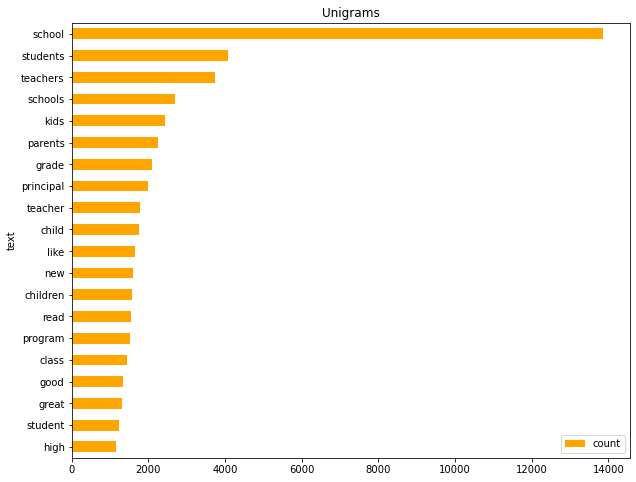

In [14]:
tokens_df.plot.barh(x='text', y='count', title="Unigrams", figsize=(10,8), color='orange').invert_yaxis()

### Bigrams

Compared to the distribution of grade levels (elementary:557, middle:320, k-8:128) there are more instances of the middle school bigram than the elementary school bigram. While much focus is placed on Elementary schools and early learning this could point to the behavioral issues that tend to arise in middle school which could be cause for more comments being made. 

Another interesting point to note is the 

In [15]:
bigrams = list(textacy.extract.ngrams(tokens, 2))

In [16]:
bigram_list = []
for x in bigrams:
    bigram_list.append(str(x))

In [17]:
bigram_frequency = Counter(bigram_list).most_common(20)
bigram_df = pd.DataFrame(bigram_frequency, columns=['text', 'count'])

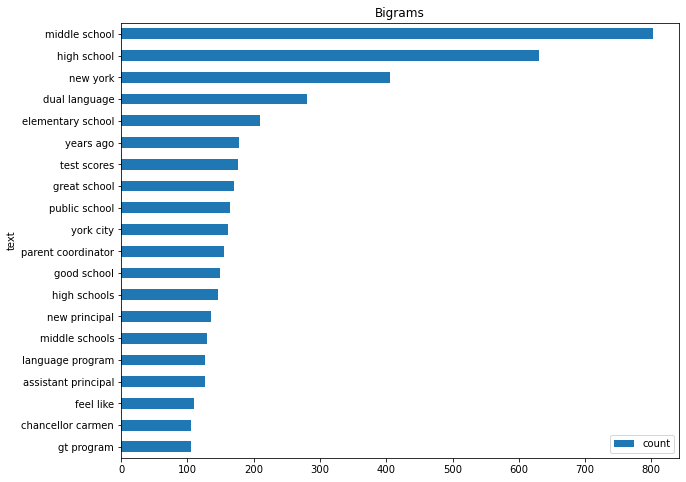

In [18]:
bigram_df.plot.barh(x='text', y='count', title="Bigrams", figsize=(10,8)).invert_yaxis()

### Trigrams

In [19]:
trigrams = list(textacy.extract.ngrams(tokens, 3))

In [20]:
trigram_list = []
for x in trigrams:
    trigram_list.append(str(x))

In [21]:
# You can add more stop words at any point then run the cells below again
comments_stop_words = [u'new york city', u'department of education']
# Loops through each new stopword added
for word in comments_stop_words:
    # Set lexeme to Spacy pipeline's vocab method where each word is passed in
    lexeme = nlp.vocab[word]
    # is_stop method used to add new word to the stopword list
    lexeme.is_stop = True

In [22]:
# Create list of word tokens after removing stopwords
trigram_tokens =[] 
# Loop through token list
for word in trigram_list:
    # Call vocab 
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        trigram_tokens.append(word) 

In [23]:
trigram_frequency = Counter(trigram_tokens).most_common(20)
trigram_df = pd.DataFrame(trigram_frequency, columns=['trigrams', 'count'])

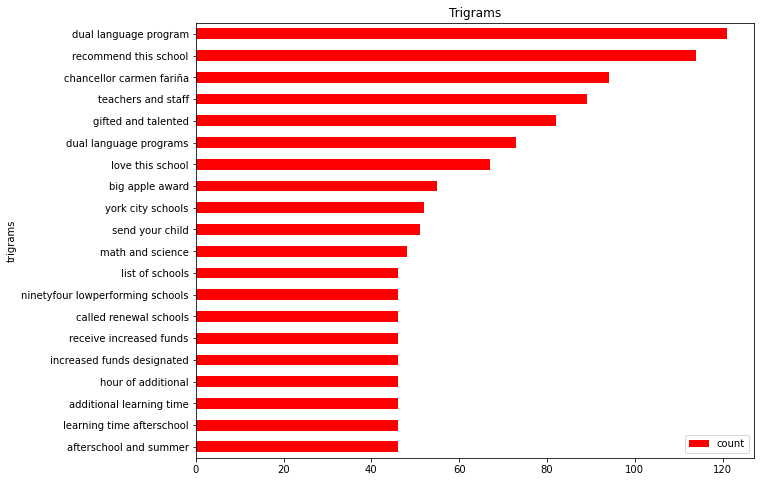

In [24]:
trigram_df.plot.barh(x='trigrams', y='count', title="Trigrams", figsize=(10,8), color='red').invert_yaxis()

---

### List of lemmas

In [25]:
lemma_list = [] 
for token in tokens:
    lemma_list.append(token.lemma_)

In [26]:
# You can add more stop words at any point then run the cells below again
comments_stop_words = [u'-PRON-']
# Loops through each new stopword added
for word in comments_stop_words:
    # Set lexeme to Spacy pipeline's vocab method where each word is passed in
    lexeme = nlp.vocab[word]
    # is_stop method used to add new word to the stopword list
    lexeme.is_stop = True

In [27]:
# Create list of word tokens after removing stopwords
filtered_lemma =[] 
# Loop through token list
for word in lemma_list:
    # Call vocab 
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_lemma.append(word)

In [28]:
# Find most common entities
lemma_frequency = Counter(filtered_lemma).most_common(20)
lemma_df = pd.DataFrame(lemma_frequency, columns=['text', 'count'])

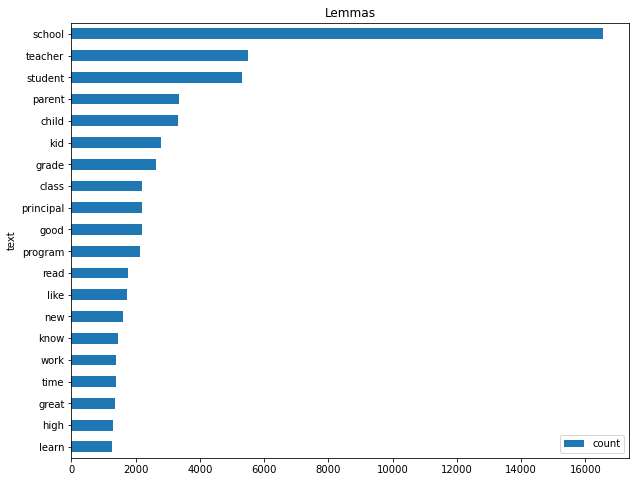

In [29]:
lemma_df.plot.barh(x='text', y='count', title="Lemmas", figsize=(10,8)).invert_yaxis()

---

---

### Named Entity Recognition (NER) Categories

**PERSON:**    People, including fictional. <br>
**NORP:**	Nationalities or religious or political groups.<br>
**FAC:**	Buildings, airports, highways, bridges, etc.<br>
**ORG:**	Companies, agencies, institutions, etc.<br>
**GPE:**	Countries, cities, states.<br>
**LOC:**	Non-GPE locations, mountain ranges, bodies of water.<br>
**PRODUCT:**	Objects, vehicles, foods, etc. (Not services.)<br>
**EVENT:**	Named hurricanes, battles, wars, sports events, etc.<br>
**WORK_OF_ART:**	Titles of books, songs, etc.<br>
**LAW:**	Named documents made into laws.<br>
**LANGUAGE:**	Any named language.<br>
**DATE:**	Absolute or relative dates or periods.<br>
**TIME:**	Times smaller than a day.<br>
**PERCENT:**	Percentage, including ”%“.<br>
**MONEY:**	Monetary values, including unit.<br>
**QUANTITY:**	Measurements, as of weight or distance.<br>
**ORDINAL:**	“first”, “second”, etc.<br>
**CARDINAL:**	Numerals that do not fall under another type.<br>


In [30]:
# Create a list of entities 
ents = list(tokens.ents)

In [31]:
ents_list = []
for x in ents:
    ents_list.append(str(x))

In [32]:
# You can add more stop words at any point then run the cells below again
comments_stop_words = [u'-PRON-']
# Loops through each new stopword added
for word in comments_stop_words:
    # Set lexeme to Spacy pipeline's vocab method where each word is passed in
    lexeme = nlp.vocab[word]
    # is_stop method used to add new word to the stopword list
    lexeme.is_stop = True

In [33]:
# Create list of word tokens after removing stopwords
filtered_ents =[] 
# Loop through token list
for word in ents_list:
    # Call vocab 
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_ents.append(word)

In [34]:
# Find most common entities
# items = [x.text for x in tokens.ents]
entity_frequency = Counter(filtered_ents).most_common(20)
entity_df = pd.DataFrame(entity_frequency, columns=['text', 'count'])

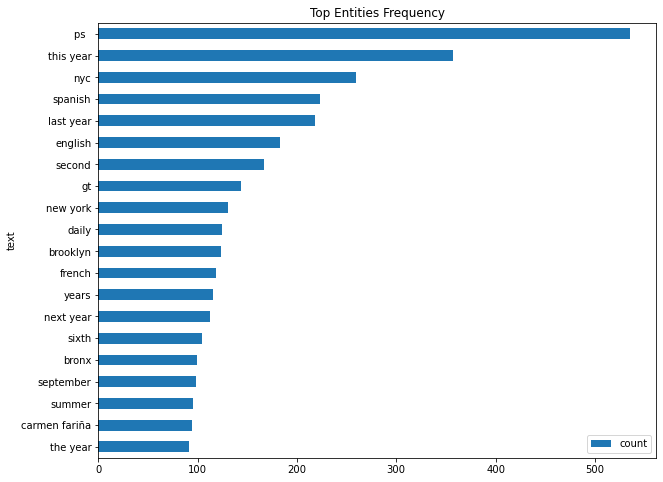

In [35]:
entity_df.plot.barh(x='text', y='count', title='Top Entities Frequency', figsize=(10,8)).invert_yaxis()

### People

In [36]:
# NER for people
person_list = []

for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

Shugan Wen school is a high performing dual language k-8 in Manhattan

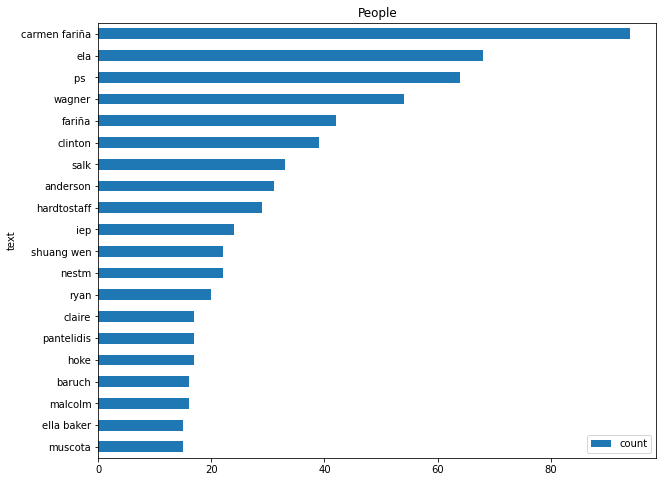

In [37]:
df_person.plot.barh(x='text', y='count', title="People", figsize=(10,8)).invert_yaxis()

### Products

In [38]:
# NER for products
product_list = []

for ent in tokens.ents:
    if ent.label_ == 'PRODUCT':
        product_list.append(ent.text)
        
product_counts = Counter(product_list).most_common(10)
df_product = pd.DataFrame(product_counts, columns =['text', 'count'])

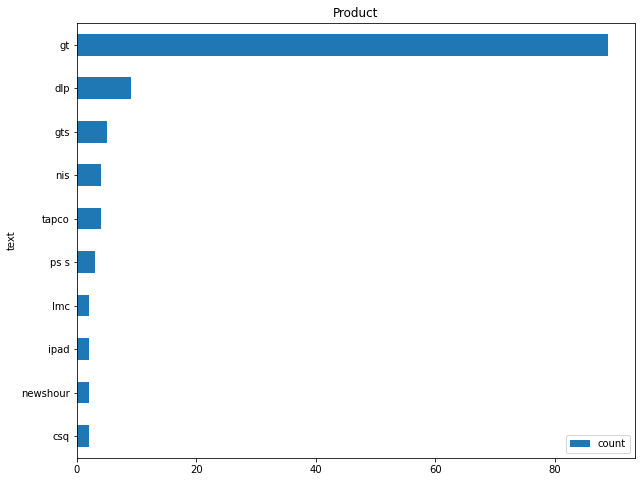

In [39]:
df_product.plot.barh(x='text', y='count', title="Product", figsize=(10,8)).invert_yaxis()

### Nationalities or Religious/Political Groups

There are no recognized nationalities or religious/political groups.

In [40]:
# NER for nationalities or religious or political groups 
norp_list = []

for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['entity', 'count'])
df_norp

,entity,count
0,spanish,150
1,french,102
2,chinese,46
3,american,37
4,hispanic,27
5,herea,17
6,asians,16
7,asian,16
8,latino,16
9,yearold,15


### Event

In [41]:
# NER for nationalities or religious or political groups 
event_list = []

for ent in tokens.ents:
    if ent.label_ == 'EVENT':
        event_list.append(ent.text)
        
event_counts = Counter(event_list).most_common(20)
df_event = pd.DataFrame(event_counts, columns =['entity', 'count'])

In [42]:
df_event

,entity,count
0,the school year,23
1,the academic year,3
2,the th grade year,3
3,hurricane sandy,3
4,my th grade year,2
5,the vietnam war,2
6,the korean war,2
7,olympics,2
8,holiday fair spring,1
9,the nschool year,1


### Work of Art

In [43]:
# NER for nationalities or religious or political groups 
woa_list = []

for ent in tokens.ents:
    if ent.label_ == 'WORK_OF_ART':
        woa_list.append(ent.text)
        
woa_counts = Counter(woa_list).most_common(20)
df_woa = pd.DataFrame(woa_counts, columns =['entity', 'count'])

In [44]:
df_woa

,entity,count
0,padlet haiku,2
1,bible,1
2,chessintheschools grand prix,1
3,esl,1
4,curriculumn,1
5,booker t washington,1
6,booker t,1
7,the s s doowop group,1
8,a hrefhttpswwwchalkbeatorgpostsnywhatnewyorkci...,1
9,the elizabeth rohatyn,1


### Language

In [45]:
# NER for nationalities or religious or political groups 
lang_list = []

for ent in tokens.ents:
    if ent.label_ == 'LANGUAGE':
        lang_list.append(ent.text)
        
lang_counts = Counter(lang_list).most_common(20)
df_lang = pd.DataFrame(lang_counts, columns =['entities', 'count'])

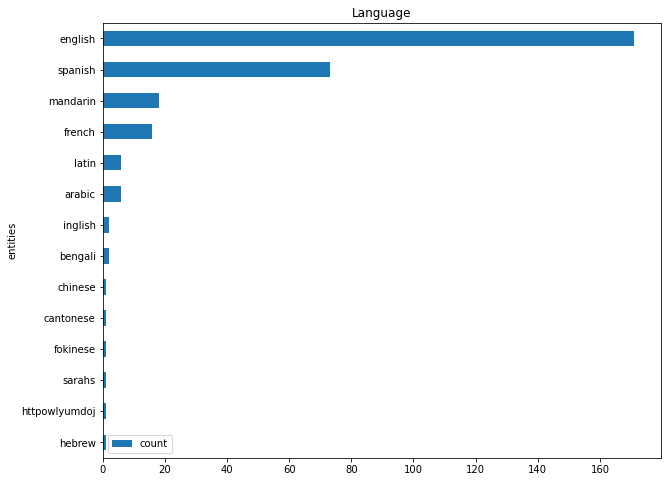

In [46]:
df_lang.plot.barh(x='entities', y='count', title="Language", figsize=(10,8)).invert_yaxis()

---

### Noun Chunks

In [47]:
# Find most common noun chunks
noun_chunks = [x.text for x in tokens.noun_chunks]
noun_chunks_frequency = Counter(noun_chunks).most_common(20)
noun_chunks_df = pd.DataFrame(noun_chunks_frequency, columns=['text', 'count'])

In [48]:
noun_chunks_df

,text,count
0,i,11738
1,you,4818
2,it,4730
3,they,4224
4,the school,3253
5,we,3030
6,this school,2689
7,she,2151
8,who,2090
9,he,1686


---

---

### Sentence Boundaries

In [49]:
# Sentence boundary
sentence = [x.root.text for x in tokens.sents]
sentence_frequency = Counter(sentence).most_common(20)
sentence_df = pd.DataFrame(sentence_frequency, columns=['text', 'count'])

In [50]:
sentence_df

,text,count
0,is,4605
1,are,1600
2,was,1312
3,have,892
4,am,509
5,had,474
6,be,458
7,m,431
8,know,430
9,think,418
